In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_neg_lda.csv')
data.isnull().sum()

Unnamed: 0    0
Tweet_In      0
dtype: int64

In [3]:
mylist = list(dict.fromkeys(data['Tweet_In']))

In [4]:
# VEktorizing

In [5]:
text = mylist

In [6]:
# import library

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(text)
print(vectorizer.get_feature_names(), '\n')
print(vector.shape)

['00', '000', '01', '08', '0907', '10', '100', '100jt', '100k', '10390862', '10998703', '10k', '11', '11mlm', '12', '120rb', '123', '14', '15', '150k', '150rb', '16', '18', '186', '18x', '19', '1wfo', '1x', '20', '200', '2019', '2020', '2021', '21', '22', '23kpa', '24', '24h', '25', '250gr', '250rb', '25th', '25yo', '26', '27', '2dp', '2jam', '2m', '2nd', '2x', '2years', '30', '300', '30am', '30k', '30kpa', '30mnt', '316', '35rb', '365', '3g', '3hari', '3kali', '3x', '40', '40pm', '4g', '4x', '50', '500', '500k', '50gb', '52', '5g', '5hakir', '5jt', '5x', '60km', '6pm', '710', '83', '8an', '90', 'aaa', 'aaaaa', 'aaaaaa', 'aahh', 'aamiin', 'aaowkaowkwwok', 'ababil', 'abang', 'abis', 'abs', 'absen', 'absensi', 'absurd', 'academy', 'acara', 'access', 'accountant', 'aceh', 'activity', 'actually', 'ada', 'adaptasi', 'ade', 'adek2nya', 'adeku', 'adelah', 'adem', 'adik', 'admin', 'adndn', 'adopsi', 'adu', 'aduh', 'aereta', 'after', 'afterall', 'again', 'agak2', 'agaknye', 'agenda', 'aghhhhh',

In [7]:
# Using gensim

In [8]:
# Tokenizing

text_list = [i.split() for i in text]
print(len(text_list))
print(text_list)

972
[['udah', 'wfh', 'sampe', 'lupa', 'ritme', 'jalan', 'capek', 'bgt', 'badan'], ['kr', '2', 'minggu', 'wfo', 'ken', 'resign', 'wfh', 'alas', 'gak', 'kuat', 'berjam2', 'pake', 'masker', 'sakit'], ['rebah', 'kala', 'closing', 'mahal', 'terima', 'kasih', 'pandemi', 'pas', 'closing', 'wfh', 'janganlupabersyukur'], ['ko', 'sedi', 'dengar', 'bap', 'ngmg', 'klo', 'udh', 'tanda2', 'wfh'], ['rindu', 'zaman', 'wfh', 'sbb', 'harini', 'kene', 'keje', 'kt', 'office', 'and', 'minum', 'kopi', 'ngantuk', 'fuck'], ['316', 'eh', 'kakak', 'kakak', 'tuh', 'kerja', 'wfh', 'salah', 'peg'], ['bilang', 'exo', 'konsep', 'sg', 'salah', 'bgt', 'gaes', 'konsep', 'wfh', 'cerita', 'simpel', 'ala', 'ala', 'mas', 'scbd', 'zoom', 'meeting'], ['i', 'seriously', 'think', 'this', 'wfh', 'culture', 'should', 'remain', 'permanent', 'jimat', 'duit', 'jimat', 'and', 'avoid', 'conflict'], ['orang', 'orang', 'kantor', 'udah', 'bosen', 'wfh', 'ken', 'wfo', '1', 'join', 'kantor'], ['opsi', 'wfh', 'sih', 'biar', 'nunggu', 'bakd

In [9]:
!pip install gensim

In [10]:
# Create phrase using Gensim, Bigram and Trigram
import gensim
from gensim.models import Phrases

In [11]:
# Create bigrams and trigrams to doc, with minimum count 5, mean only upper than 5 times or more.
bigram = gensim.models.Phrases(text_list, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[text_list], threshold=100)

In [32]:
# Tokening bigram and trigram into document

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Create dictionary from text_list

from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

# no_below = keep token which are contained in at least no_below document
# no_above = keep token which are contained in no more than no_above document

print(dictionary)

Dictionary(344 unique tokens: ['badan', 'bgt', 'capek', 'jalan', 'lupa']...)


C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Convert corpus into matrix using dictionary

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

# doc2bow is a function which convert document(list of words) into bag-of-words (vectorizing method)

print(len(doc_term_matrix))
print(doc_term_matrix[10])
tfidf = models.TfidfModel(doc_term_matrix) # build tfidf model
corpus_tfidf = tfidf[doc_term_matrix]

972
[(45, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)]


C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# modeling using gensim and using Coherence Score to evaluate model

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# Fuction to compute coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                                    dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Apply function

start = 1
limit = 10 # 10 topic
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start,
                                                        limit=limit, step=step)

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


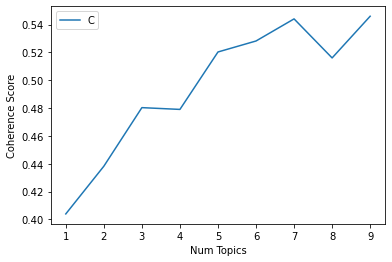

In [40]:
# Visualize the graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('Coherence Values'), loc='best')
plt.show()

In [41]:
# Print Coherence Score

for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, ' has Coherence Value of', round(cv, 5))

Num Topics = 1  has Coherence Value of 0.40392
Num Topics = 2  has Coherence Value of 0.4382
Num Topics = 3  has Coherence Value of 0.4803
Num Topics = 4  has Coherence Value of 0.47902
Num Topics = 5  has Coherence Value of 0.5203
Num Topics = 6  has Coherence Value of 0.52819
Num Topics = 7  has Coherence Value of 0.54407
Num Topics = 8  has Coherence Value of 0.51602
Num Topics = 9  has Coherence Value of 0.54598


C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# n_topic = 9, best coherence value

In [42]:
# Finding dominant word

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=9) # after look at coherence values
for idx, topic in model.print_topics():
    print('Topic: {} Word: {}'.format(idx, topic))

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.034*"kerja" + 0.017*"pas" + 0.016*"kalo" + 0.016*"dgn" + 0.015*"jam" + 0.013*"senin" + 0.013*"gak" + 0.012*"to" + 0.011*"i" + 0.010*"wfo"
Topic: 1 Word: 0.031*"rumah" + 0.021*"banget" + 0.020*"minggu" + 0.016*"butuh" + 0.015*"kerja" + 0.013*"gak" + 0.012*"kak" + 0.012*"kantor" + 0.010*"tidur" + 0.010*"pagi"
Topic: 2 Word: 0.032*"nih" + 0.021*"covid_19" + 0.017*"buka" + 0.016*"je" + 0.015*"iya" + 0.014*"kalo" + 0.014*"mager" + 0.014*"ambil" + 0.013*"gilir" + 0.013*"biasa"
Topic: 3 Word: 0.026*"wfo" + 0.023*"kalo" + 0.017*"full" + 0.017*"2" + 0.016*"je" + 0.015*"udah" + 0.015*"kerja" + 0.015*"intern" + 0.014*"kantor" + 0.013*"meja"
Topic: 4 Word: 0.031*"besok" + 0.027*"udah" + 0.025*"kerja" + 0.017*"wfo" + 0.014*"internet" + 0.013*"bikin" + 0.012*"minggu" + 0.012*"kalo" + 0.011*"teh" + 0.011*"sakit"
Topic: 5 Word: 0.021*"kerja" + 0.017*"udah" + 0.017*"syukur" + 0.015*"pandemi" + 0.014*"anak" + 0.014*"masuk" + 0.013*"ken" + 0.011*"new" + 0.011*"pa" + 0.011*"semangat"
Topi

In [43]:
# Show top 10 words in each topic

top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn=10)])

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
df_new = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
df_new

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Word,P
0,0,kerja,0.034247
1,0,pas,0.016758
2,0,kalo,0.016453
3,0,dgn,0.015761
4,0,jam,0.015277
...,...,...,...
85,8,sampe,0.012440
86,8,kalo,0.012092
87,8,dr,0.010712
88,8,tetep,0.010652


In [30]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


In [46]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.save_html(vis, 'lda-gensim-sentiment-negatif.html')

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
